In [1]:
from itertools import product, combinations, cycle
from functools import reduce
from math import prod

In [3]:
# fname = 'example.txt'
# fname = 'input.txt'
fname = 'example2.txt'
        
with open(fname) as f:
    lines = f.readlines()

# [(on, [int(num) for num in rang.replace('x=', '').replace('y=', '').replace('z', '').replace('=', '').split('..') for rang in xyz.split(',')]) for on, xyz in [line.strip().split(' ') for line in lines]]

onoffs, ranges = [], []
# for line in lines[0:20]:
for line in lines:
    onoff, xyz = line.strip().split(' ')
    ranges_letters = xyz.split(',')
    range_3d = tuple([tuple(int(val) for val in range_letter.split('=')[1].split('..')) for range_letter in ranges_letters])
    onoffs.append(onoff)
    ranges.append(range_3d)

instructions = list(zip(onoffs, ranges))
# instructions

In [5]:
def single_range_intersection(r1, r2):
    # https://scicomp.stackexchange.com/a/26260
    low, high = 0, 1 # assuming in order
    if len(r1) != 2 or len(r2) != 2:
#         print(r1, r2)
        return []
    if r2[low] > r1[high] or r1[low] > r2[high]:
        return [] # no intersection
    else:
        return (max(r1[low], r2[low]), min(r1[high], r2[high]))
    

single_range_intersection((0, 2), (2, 4)) # NOTE THIS EDGE CASE

(2, 2)

In [6]:
def range_intersection(range_1, range_2):
#     x1, y1, z1 = range_1
#     x2, y2, z2 = range_2
    return [single_range_intersection(*ranges) for ranges in zip(range_1, range_2)]

r1 = [(-82717, -58814), (9792, 34867), (31729, 41188)]
r2 = [(-62226, -36572), (-17931, -2307), (64240, 74646)]

test_range_intersections = range_intersection(r1, r2)
test_range_intersections

[(-62226, -58814), [], []]

In [7]:
def range_intersection_idxs(idx_1, idx_2):
    return [single_range_intersection(*ranges) for ranges in zip(ranges[idx_1], ranges[idx_2])]

test_range_intersections = range_intersection_idxs(0, 1)
test_range_intersections

[(-5, 5), (-27, 21), (-14, 33)]

In [8]:
def intersection_size(intersection_3d):
    # TODO: is the '+1' correct
    return prod([max(rang)-min(rang)+1 if rang else 0 for rang in intersection_3d])


In [9]:
# TODO: this doesn't take into account the on/off command

double_intersections = []

iter_count = 0
for ii, r1_3d in enumerate(ranges):
    for jj, r2_3d in enumerate(ranges):
        if jj >= ii:
            continue
                
        iter_count += 1

        if not iter_count % 1000000:
            print(f"{iter_count}")
        #     if not (r1_3d != r2_3d != r3_3d):

        if r1_3d == r2_3d:
            continue
            
        if intersection_size(range_intersection(r1_3d, r2_3d)):    
#             double_intersections.append(set([r1_3d, r2_3d]))
            double_intersections.append(set([ii, jj]))

len(double_intersections), len(set([frozenset(doub) for doub in double_intersections]))

(376, 376)

In [10]:
# can you find the same triple intersections by considering only the double intersections? -- YES!

triple_intersections = set()
for (ii, jj) in double_intersections:
    for kk, r3_3d in enumerate(ranges):
    
        r1_3d = ranges[ii]
        r2_3d = ranges[jj]
        
        if frozenset([ii, jj, kk]) in triple_intersections or kk in (ii, jj):
            continue

        if intersection_size(range_intersection(r3_3d, range_intersection(r1_3d, r2_3d))):
            triple_intersections.add(frozenset([ii, jj, kk]))

len(triple_intersections)#, len(set([frozenset(trip) for trip in triple_intersections]))

992

In [11]:
# brute-force calculate all w-way intersections, 2 <= w <= N 

w_way_ints = {}
for way in range(2,20+1):
    print(way)
    w_way_ints[way] = set()
    for combs in combinations(ranges, r=way):
        
        way_int = reduce(range_intersection, combs)
        if not [] in way_int:
            w_way_ints[way].add(frozenset(set([ranges.index(ran) for ran in combs])))

for ww in w_way_ints:
    print(ww, len(w_way_ints[ww]))

2
3
4
5


KeyboardInterrupt: 

In [ ]:
w_way_ints = {}
w_way_ints[1] = set(tuple(el) for el in list(range(len(ranges))))
for way in range(2,2+1):
    print(way)
    w_way_ints[way] = set()
    for combs in w_way_ints[way - 1]:
        for ii in range(len(ranges)):      
            way_int = reduce(range_intersection_idxs, combs + [ii])
            if not [] in way_int:
                w_way_ints[way].add(frozenset(combs + [ii]))

for ww in w_way_ints:
    print(ww, len(w_way_ints[ww]))

In [145]:
# w_way_ints[2].difference(set([frozenset(double) for double in double_intersections]))
w_way_ints[3].difference(set([frozenset(triple) for triple in triple_intersections]))

{frozenset({2, 11, 12}),
 frozenset({2, 4, 12}),
 frozenset({2, 12, 17}),
 frozenset({2, 12, 19}),
 frozenset({0, 2, 12}),
 frozenset({1, 2, 12}),
 frozenset({2, 3, 12}),
 frozenset({2, 12, 13}),
 frozenset({2, 9, 12}),
 frozenset({2, 7, 12})}

In [163]:
test_comb = [ranges[ii] for ii in [2, 11, 12]]
intersection = reduce(range_intersection, test_comb)
print(intersection)
print(intersection_size(intersection))

[(-22, -4), (10, 10), (-4, 10)]
0


# TODO: test multi-intersect algorithm `intersection_size(range_intersection(r4_3d, range_intersection(r3_3d, range_intersection(r1_3d, r2_3d)))):`

In [55]:
# for ii, jj, kk in list(triple_intersections)[0:10]:
for ii, jj, kk in triple_intersections:
    print("========================================")
    r1_3d = ranges[ii]
    r2_3d = ranges[jj]
    r3_3d = ranges[kk]

    print(f"volumes {(ii, jj, kk)}:")
    print(r1_3d)
    print(r2_3d)
    print(r3_3d)
    print(f" {ii} and {jj} intersection:")
    int_1_2 = range_intersection(r1_3d, r2_3d)
    print(range_intersection(r1_3d, r2_3d))
    print("size:")
    print(intersection_size(int_1_2))
#     print("(1 and 2) and 3 intersection:")
    print(f" ({ii} and {jj}) and {kk} intersection:")
    int_1_2_3 = range_intersection(r3_3d, int_1_2)
    print(int_1_2_3)
    print("size:")
    print(intersection_size(int_1_2_3))

volumes (0, 1, 2):
((-33, 18), (-35, 11), (-49, 2))
((-14, 32), (5, 49), (-42, 5))
((-28, 18), (-38, 10), (-14, 33))
 0 and 1 intersection:
[(-14, 18), (5, 11), (-42, 2)]
size:
8448
 (0 and 1) and 2 intersection:
[(-14, 18), (5, 10), (-14, 2)]
size:
2560
volumes (0, 1, 3):
((-33, 18), (-35, 11), (-49, 2))
((-14, 32), (5, 49), (-42, 5))
((-40, 6), (-22, 32), (-32, 13))
 0 and 1 intersection:
[(-14, 18), (5, 11), (-42, 2)]
size:
8448
 (0 and 1) and 3 intersection:
[(-14, 6), (5, 11), (-32, 2)]
size:
4080
volumes (0, 2, 3):
((-33, 18), (-35, 11), (-49, 2))
((-28, 18), (-38, 10), (-14, 33))
((-40, 6), (-22, 32), (-32, 13))
 0 and 2 intersection:
[(-28, 18), (-35, 10), (-14, 2)]
size:
33120
 (0 and 2) and 3 intersection:
[(-28, 6), (-22, 10), (-14, 2)]
size:
17408
volumes (1, 2, 3):
((-14, 32), (5, 49), (-42, 5))
((-28, 18), (-38, 10), (-14, 33))
((-40, 6), (-22, 32), (-32, 13))
 1 and 2 intersection:
[(-14, 18), (5, 10), (-14, 5)]
size:
3040
 (1 and 2) and 3 intersection:
[(-14, 6), (5, 10

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


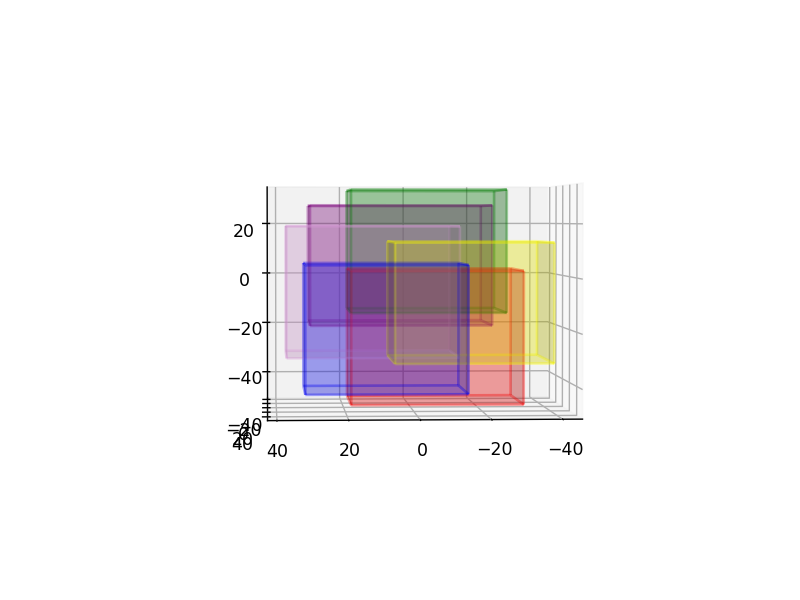

C:\Users\jacob\AppData\Local\Temp/ipykernel_2508/2223576996.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [57]:
# https://codereview.stackexchange.com/q/155585

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")

def x_y_edge(x_range, y_range, z_range, color):
    xx, yy = np.meshgrid(x_range, y_range)

    for value in [0, 1]:
        zz = np.zeros_like(xx)
        zz[:,:] = z_range[value]
        
        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def y_z_edge(x_range, y_range, z_range, color):
    yy, zz = np.meshgrid(y_range, z_range)

    for value in [0, 1]:
        xx = np.zeros_like(yy)
        xx[:,:] = x_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def x_z_edge(x_range, y_range, z_range, color):
    xx, zz = np.meshgrid(x_range, z_range)

    for value in [0, 1]:
        yy = np.zeros_like(zz)
        yy[:,:] = y_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def rect_prism(x_range, y_range, z_range, color="r"):
    x_y_edge(x_range, y_range, z_range, color)
    y_z_edge(x_range, y_range, z_range, color)
    x_z_edge(x_range, y_range, z_range, color)


def run():
#     rect_prism(np.array([-1, 1]),
#                np.array([-1, 1]),
#                np.array([-1, 1]))

    colors = ["red", "blue", "green", "yellow", "plum", "purple", "orange"]
    for col, ran in zip(cycle(colors), ranges[:20]):
        rect_prism(*np.array(ran), col)
#     rect_prism(*np.array(range_intersection(ranges[0], ranges[1])), color="b")
    plt.show()

run()

In [36]:
# my brain is broken. all 3-way intersections have all 3 expected 2-way intersections, but there's more 3's somehow???

reused = set()
for ii, jj, kk in triple_intersections:
    print(ii, jj, kk)
    
    for a, b in combinations([ii, jj, kk], r=2):
        two_way = frozenset([a, b])
        print(two_way)
        assert two_way in double_intersections
        if not two_way in reused:
            print(f"first use of {two_way}")
            reused.add(two_way)
    

0 1 2
frozenset({0, 1})
first use of frozenset({0, 1})
frozenset({0, 2})
first use of frozenset({0, 2})
frozenset({1, 2})
first use of frozenset({1, 2})
0 1 3
frozenset({0, 1})
frozenset({0, 3})
first use of frozenset({0, 3})
frozenset({1, 3})
first use of frozenset({1, 3})
0 2 3
frozenset({0, 2})
frozenset({0, 3})
frozenset({2, 3})
first use of frozenset({2, 3})
1 2 3
frozenset({1, 2})
frozenset({1, 3})
frozenset({2, 3})
0 1 4
frozenset({0, 1})
frozenset({0, 4})
first use of frozenset({0, 4})
frozenset({1, 4})
first use of frozenset({1, 4})
0 2 4
frozenset({0, 2})
frozenset({0, 4})
frozenset({2, 4})
first use of frozenset({2, 4})
1 2 4
frozenset({1, 2})
frozenset({1, 4})
frozenset({2, 4})
0 3 4
frozenset({0, 3})
frozenset({0, 4})
frozenset({3, 4})
first use of frozenset({3, 4})
1 3 4
frozenset({1, 3})
frozenset({1, 4})
frozenset({3, 4})
2 3 4
frozenset({2, 3})
frozenset({2, 4})
frozenset({3, 4})
0 1 5
frozenset({0, 1})
frozenset({0, 5})
first use of frozenset({0, 5})
frozenset({1, 5})